In [1]:
#Importing the modules
import numpy as np 
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
import pandas as pd 
import matplotlib.pyplot as plt
import os
import pickle

In [39]:
#Loading the data sets
df = pd.read_csv('C:/Users/DCL/Downloads/covid_dataset.csv')
df.head()
Days = np.array(df['Day'])
#print("Days",Days)
Confirmed = np.array(df['Confirmed case'])
#print("Confirmed",Confirmed)
Deaths = np.array(df['Death Case'])
#print("Deaths",Deaths)
#Recovered = np.array(df['Recovered'])
#print("Recovered",Recovered)



In [40]:
df.insert(0, 'NDays', range(1, 1 + len(df)))

In [41]:
df.head()

,NDays,Day,Lab Test,Confirmed case,Death Case
0,1,2020-April-04,434,9,2
1,2,2020-April-05,367,18,1
2,3,2020-April-06,468,35,3
3,4,2020-April-07,679,41,5
4,5,2020-April-08,981,54,3


In [42]:
Days = np.array(df['NDays'])
#print("Days",Days)

In [43]:
del df['Day']



In [44]:
df.head()

,NDays,Lab Test,Confirmed case,Death Case
0,1,434,9,2
1,2,367,18,1
2,3,468,35,3
3,4,679,41,5
4,5,981,54,3


In [45]:
del df['Lab Test']

In [46]:
df.head()

,NDays,Confirmed case,Death Case
0,1,9,2
1,2,18,1
2,3,35,3
3,4,41,5
4,5,54,3


In [47]:
#Creating randon indices for spliting the data set
random_indices = np.random.permutation(626)
#print(random_indices)

In [48]:
#Input train/test feature
Days_train = Days[random_indices[:]]
#Days_test = Day[random_indices[:]]

In [49]:
#Output train/test feature
Confirmed_train = Confirmed[random_indices[:]]
#Confirmed_test = Confirmed[random_indices[58:]]

Deaths_train = Deaths[random_indices[:]]
#Deaths_test = Deaths[random_indices[58:]]

In [50]:
#Cheaking the lenth of taring sample
print(len(Confirmed_train))
print(len(Deaths_train))

626
626


In [51]:
#Using Linear Regression 
#Function for training the model with decision tree
#Parameter of the functions are:
    #1. x_train = input feature training set
    #2. y_train = output feature training set
    
    
def model_train(x_train,y_train):
    #fitting the data into the model
    model = linear_model.LinearRegression()#Creating instance of linear model
    #sklearn takes input as matrix so the we have to reshape the matrix into colloum matrix
    x_train_for_fittng = np.matrix(x_train.reshape(len(x_train),1))
    y_train_for_fittng = np.matrix(y_train.reshape(len(y_train),1))
    
    #fit the data into the model
    return(model.fit(x_train_for_fittng,y_train_for_fittng))

In [18]:
'''#Calling the Linear regrassing function
model = model_train(Days_train,Confirmed_train)
model_prediction = model.predict(Days.reshape((len(Days),1)))

#Ploring the curve(Red : Traning Data, GREEN : Prediction  )
plt.scatter(Days_train,Confirmed_train,color="red")
plt.plot(Days.reshape((len(Days),1)),model_prediction,color="green")'''

'#Calling the Linear regrassing function\nmodel = model_train(Days_train,Confirmed_train)\nmodel_prediction = model.predict(Days.reshape((len(Days),1)))\n\n#Ploring the curve(Red : Traning Data, GREEN : Prediction  )\nplt.scatter(Days_train,Confirmed_train,color="red")\nplt.plot(Days.reshape((len(Days),1)),model_prediction,color="green")'

In [52]:
#Function for Polynomial regrassing function
def poly_regr(X_train,Y_train,degree):
    polynom = PolynomialFeatures(degree=degree)
    X_poly = polynom.fit_transform(X_train.reshape(len(X_train),1))
    polyReg = LinearRegression()
    #Returing the fitted model
    return polyReg.fit(X_poly,Y_train.reshape(len(Y_train),1)) 

In [53]:
#calling the plynomial regrassion model for confirm case
polynom = PolynomialFeatures(degree=4)
model = poly_regr(Days_train,Confirmed_train,4)
#Printing the model
print(model)

#Savhing the model into required dictory
'''import pickle
#creation a binary file first
with open('D:\Project\Corona_virus\Andriod_app\Andriod_app\covi19ModelConfirm','wb') as f:
    pickle.dump(model,f)'''

#Pridiction the mode on traning data
predict = model.predict(polynom.fit_transform(Days_train.reshape(len(Days_train),1)))
#print(predict)

LinearRegression()


In [54]:
#Creating Array of custom Days
Days_array = []
#Creating Days Data for further Prediction
for i in range(1,550):
    Days_array.append(i) 
#Converting arary into np array    
Days_predict = np.array(Days_array)
#Predict the model on Future Date 
predict_Confirm = model.predict(polynom.fit_transform(Days_predict.reshape(len(Days_predict),1)))

'''#creation a binary file first
with open('D:\Project\Corona_virus\Andriod_app\Andriod_app\covi19ModelConfirm','wb') as f:
    pickle.dump(model,f)'''
    

"#creation a binary file first\nwith open('D:\\Project\\Corona_virus\\Andriod_app\\Andriod_app\\covi19ModelConfirm','wb') as f:\n    pickle.dump(model,f)"

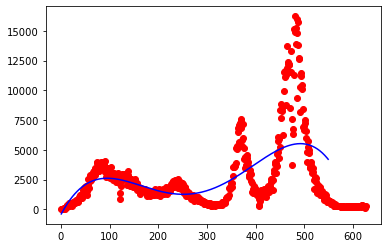

In [55]:
#Ploting the curve(Red: Traning Data, Blue: Future Prediction) for confirm case
plt.scatter(Days_train,Confirmed_train,color="red")
plt.plot(Days_predict,predict_Confirm,color='blue')

In [56]:
#calling the plynomial regrassion model for Death Case
polynom = PolynomialFeatures(degree=4)
model = poly_regr(Days_train,Deaths_train,4)
#Printing the model
print(model)

'''#Savhing the model into required dictory
#creation a binary file first
with open('D:\Project\Corona_virus\Andriod_app\Andriod_app\covi19ModelDeath','wb') as f:
    pickle.dump(model,f)'''
    
    
#Pridiction the mode on traning data
predict = model.predict(polynom.fit_transform(Days_train.reshape(len(Days_train),1)))

LinearRegression()


In [57]:
#Predict the model on Future Date 
predict_Death = model.predict(polynom.fit_transform(Days_predict.reshape(len(Days_predict),1)))

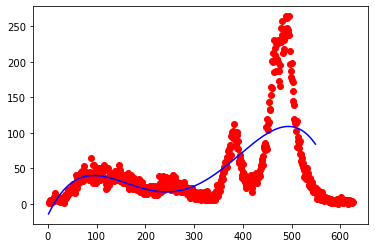

In [58]:
#Ploting the curve(Red: Traning Data, Blue: Future Prediction) for Death case
plt.scatter(Days_train,Deaths_train,color="red")
plt.plot(Days_predict,predict_Death,color='blue')